<br><br><br><br>

<CENTER><font size=12px, face = \"times new roman\">Machine Learning</font></CENTER>

<br><br><br><br>

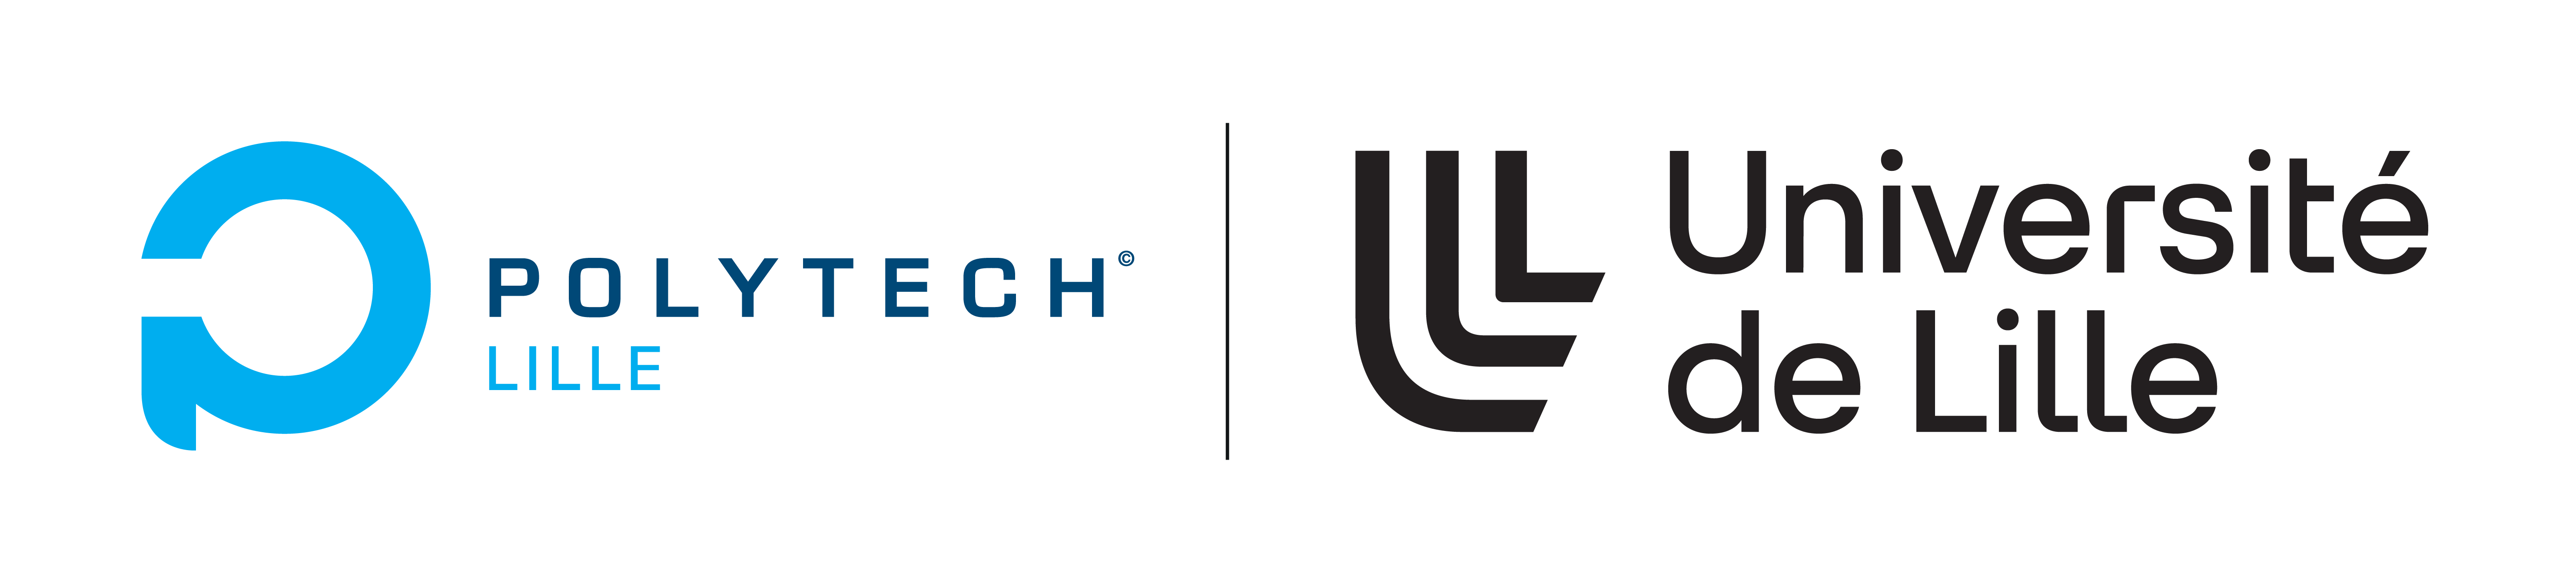

<p><CENTER>Elève:&emsp;MASSON KEVIN <br>Enseignants:&emsp;KESSACI&ensp;ROUSSEL</CENTER></p>

<br><br><br><br>

## TP 5

## Méthode Random Search

Utilisons le module [sklearn.model_selection.RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) pour paramétrer un random forest avec la méthode GridSearch.

**§ Proposer un protocole pour configurer un random forest avec le module RandomSearchCV**



Nous entrainons un modèle RandomForestClassifier sur lequel on applique RandomizedSearchCV afin d'obtenir les hyperparamètres en utilisant $clf.best_params_$

**§ Appliquer ce protocole sur le jeu de données digits**

In [37]:
X = mydigits.data
y = mydigits.target
parameters = {'n_estimators':[10,50,75,100,150], 'max_depth':[1,3,5,7,10,15]}
rfc = RandomForestClassifier()
clf = RandomizedSearchCV(rfc, parameters)
clf.fit(X, y)

clf.best_params_

{'n_estimators': 100, 'max_depth': 15}

**§ Comparer les résultats obtenus avec les méthodes GridSearch et RandomSearch puis discuter des résultats**

Les résultats obtenus sont différents. Cependant, pour les itérations avec des n_estimators et max_depth élevées nous obtenons des accuracy similaires, ainsi le résultat des hyperparamètres peut varier.

### Successive Halving

Le successive halving est une technique qui s'associe aux méthodes GridSearch et RandomSearch. La [documentation](https://scikit-learn.org/stable/modules/grid_search.html#) donnée précédemment traite du successive halving.

**§ Expliquer en quoi consiste le successive halving**

Le Successive Halving a pour objectif de réduire progressivement l'espace des hyperparamètres à explorer. L'algorithme fonctionne en sélectionnant un petit ensemble de combinaisons d'hyperparamètres et en entraînant un modèle sur chacune d'entre elles pendant un nombre fixe d'itérations. A chaque itération, les meilleurs modèles sont ensuite sélectionnés et les hyperparamètres qui ont produit les modèles les plus performants sont conservés pour la prochaine itération de l'algorithme jusqu'à obtention des meilleurs hyperparamètres.

**§ Donner les modules SkLearn qui permettent d'utiliser le successive having**

In [4]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import HalvingRandomSearchCV

**§ Lister les principaux paramètres et expliquer leur intérêt**


Les principaux paramètres sont : 
<br>
<ul>
    <li>estimator : Le modèle que l'on souhaite optimiser
    <li>param_distributions/param_grid : dictionnaire du choix d'hyperparamètres
    <li>factor : la réduction de l'espace de recherche à chaque itération
    <li>min_resources/max_resources : nombre minimum/maximum de ressources pour chaque combinaison de paramètres
    <li>cv : le nombre de test de validation croisée à utiliser lors de l'évaluation de la performance.
</ul>

**§ Proposer un protocole qui permet de comparer les méthodes GridSearch et RandomSearch avec et sans le successive halving**


Déterminer les hyperparamètres avec les 2 méthodes, et ensuite effectuer une comparaison des temps d'éxécution et des performances du modèle avec les hyperparamètres sélectionnés. Avec le successive halving nous comparons avec HalvingGridSearchCV et HalvingRandomSearchCV.

**§ Appliquer ce protocole sur le jeu de données digits**


In [27]:
from sklearn.ensemble import RandomForestClassifier
import time
mydigits = load_digits(as_frame = True)

X = mydigits.data
y = mydigits.target

# Définition de l'estimateur de modèle
estimator = RandomForestClassifier()



In [28]:
# Définition de la grille d'hyperparamètres à optimiser
param_grid = {'n_estimators': [10,20,30,50,70,80, 100],
              'max_depth': [3, 5,7,8, 10,12,13, 15]}

# Définition de la classe d'optimisation avec Successive Halving
tps1 = time.time()
cv = HalvingGridSearchCV(estimator, param_grid, factor=3,  
                         scoring='accuracy', random_state=42)

# Lancement de l'optimisation des hyperparamètres
cv.fit(X, y)

# Affichage des résultats de l'optimisation
print(f"Meilleurs hyperparamètres : {cv.best_params_}")
print(f"Score de validation croisée avec les meilleurs hyperparamètres : {cv.best_score_:.3f}")
tps2 = time.time()
print("Temps de réalisation :",tps2-tps1)

Meilleurs hyperparamètres : {'max_depth': 12, 'n_estimators': 80}
Score de validation croisée avec les meilleurs hyperparamètres : 0.929
Temps de réalisation : 27.080606937408447


In [29]:
# Définition de la grille d'hyperparamètres à optimiser
param_distributions = {'n_estimators': [10,20,30,50,70,80, 100],
              'max_depth': [3, 5,7,8, 10,12,13, 15]}

# Définition de la classe d'optimisation avec Successive Halving
tps1 = time.time()
cv = HalvingRandomSearchCV(estimator, param_distributions, factor=3,  
                         scoring='accuracy', random_state=42)

# Lancement de l'optimisation des hyperparamètres
cv.fit(X, y)

# Affichage des résultats de l'optimisation
print(f"Meilleurs hyperparamètres : {cv.best_params_}")
print(f"Score de validation croisée avec les meilleurs hyperparamètres : {cv.best_score_:.3f}")
tps2 = time.time()
print("Temps de réalisation :",tps2-tps1)

Meilleurs hyperparamètres : {'n_estimators': 80, 'max_depth': 8}
Score de validation croisée avec les meilleurs hyperparamètres : 0.922
Temps de réalisation : 9.499009847640991




**§ Discuter les résultats obtenus**

HalvingGridSearch est plus performant de 0,07 mais est cependant 3 fois plus long que le HalvingRandomSearch. Ainsi, utiliser le successive halving sur la méthode RandomSearch est plus intéressant. 



### AutoML 

L'auto-ML permet d'automatiser le choix des composants et leur paramétrage d'un pipeline de machine learning.



[Auto-sklearn](https://www.automl.org/automl/auto-sklearn/) est un outil d'AutoML. 


**§ Rappeler la définition d'un pipeline de machine learning**

Un pipeline en Machine Learning coorespond à la phase de prétraitement et de transformation des données qui doivent être exécutées avant l'entraînement du modèle.


**§ Définir un protocole expérimental permettant de trouver un pipeline (ici, normalisation + classification supervisée) performant sur le jeu de données breast-cancer**

**Importation packages et datasets**

In [57]:
from sklearn import datasets
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

mybreast_cancer = load_breast_cancer(as_frame= True)

(569, 31)

**Création des train_test**

In [37]:
X = mybreast_cancer.data
y = mybreast_cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10)

**Normalisation des données**

Comme étudié dans le premier TP, nous avons vu l'importance de normaliser les données X_train évitant l'overfitting et améliorant la performance du modèle

In [40]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

**Choix de du modèle à appliquer**

In [41]:
estimator = RandomForestClassifier()

**Application du HalvingRandomSearchCV**

In [60]:
# Définition de la grille d'hyperparamètres à optimiser
param_distributions = {'n_estimators': [10,20,30,50,70,80, 100],
              'max_depth': [3, 5,7,8,10,12,13, 15]
              }

# Définition de la classe d'optimisation avec Successive Halving
tps1 = time.time()
cv = HalvingRandomSearchCV(estimator, param_distributions, factor=3,  
                         scoring='accuracy', random_state=42)

# Lancement de l'optimisation des hyperparamètres
cv.fit(X_train_scaled, y_train)

# Affichage des résultats de l'optimisation
print(f"Meilleurs hyperparamètres : {cv.best_params_}")
print(f"Score de validation croisée avec les meilleurs hyperparamètres : {cv.best_score_:.3f}")
tps2 = time.time()
print("Temps de réalisation :",tps2-tps1)

Meilleurs hyperparamètres : {'n_estimators': 30, 'max_depth': 13}
Score de validation croisée avec les meilleurs hyperparamètres : 0.960
Temps de réalisation : 8.882360219955444


Nous pourrions améliorer cette méthode de recherche d'hyperparamétrage en améliorant notre liste param_distributions afin de rechercher un meilleur lot d'hyperparamètre.

In [82]:
# Définition de la grille d'hyperparamètres à optimiser
param_distributions = {'n_estimators': [10,20,30,50,70,80, 100],
              'max_depth': [3, 5,7,8,10,12,13, 15],
              'bootstrap' : [True, False],
              'criterion' : ["gini", "entropy"],
              'min_samples_split' : [5,10,20,50],
              'min_samples_leaf' : [5,10,20,50]}

# Définition de la classe d'optimisation avec Successive Halving
tps1 = time.time()
cv = HalvingRandomSearchCV(estimator, param_distributions, factor=3,  
                         scoring='accuracy', random_state=42, min_resources = 150, max_resources = 350)

# Lancement de l'optimisation des hyperparamètres
cv.fit(X_train_scaled, y_train)

# Affichage des résultats de l'optimisation
print(f"Meilleurs hyperparamètres : {cv.best_params_}")
print(f"Score de validation croisée avec les meilleurs hyperparamètres : {cv.best_score_:.3f}")
tps2 = time.time()
print("Temps de réalisation :",tps2-tps1)

Meilleurs hyperparamètres : {'n_estimators': 10, 'min_samples_split': 10, 'min_samples_leaf': 10, 'max_depth': 15, 'criterion': 'entropy', 'bootstrap': False}
Score de validation croisée avec les meilleurs hyperparamètres : 0.952
Temps de réalisation : 0.29091763496398926


En augmentant le jeu d'hyperparamètre, et en déterminant un nombre min et max de ressources à utiliser, on réduit considérablement le temps d'éxecution de notre modèle en diminuant de très peu sa performance. Il faut aussi noter qu'on réduit la probabilité d'effectuer de l'overfitting ainsi.





**Prédiction sur le jeu de test**

In [83]:
cross_val_score(cv, X_test, y_test, cv=5).mean()

0.9469416785206258